## Classification, Part A

1. **Problem Explanation**  
   In this section, we aim to solve a classification problem using logistic regression, a baseline model, and another classification model. The problem chosen for this task is [specify if binary or multiclass classification]. We seek to understand which attributes are important for distinguishing between classes and compare the performance of logistic regression with other methods. 

In [39]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from ucimlrepo import fetch_ucirepo 

import plotly.io as pio

pio.renderers.default = "notebook"

In [40]:
# Visualize Freq vs mg/m3 for CO:

# Load the dataset
data = fetch_ucirepo(id=551)


In [43]:
# Load the df 
df = data.data.features

# Extract CO and then drop the columns 'CO' and 'NOX'
CO = df['CO']
df = df.drop(columns=['CO', 'NOX'])

# Standardize the data
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot CO
fig = px.histogram(CO, nbins=50, title='Distribution of CO')
fig.show()

# Binarize CO
CO_binarized = CO.apply(lambda x: 0 if x <= 2.5 else 1)
count_ones = np.sum(CO_binarized == 1)
count_zeros = np.sum(CO_binarized == 0)
print("Low",count_zeros,"High",count_ones, "proportion",(count_ones/count_zeros))

# Plot CO Binarized
fig = px.histogram(CO_binarized, title='Distribution of CO Binarized')
fig.show()

Low 26009 High 10724 proportion 0.4123188127186743


2. **Model Comparison**  
   We will compare three models: logistic regression, method 2 [specify the additional method, e.g., decision trees, k-nearest neighbors], and a baseline model. The baseline model predicts all test data as belonging to the largest class in the training data. Logistic regression will include a regularization parameter, denoted by λ, while method 2 will have its own complexity-controlling parameter. 

In [5]:
# Logistic Regression with Regularization

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(df_standardized, CO_binarized, test_size=0.7, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_standardized, CO_binarized, test_size=0.4)


# Create a Logistic Regression model with regularization
model = LogisticRegression(penalty='l2', C=1/10, max_iter=1000) 

# Train the model
model.fit(X_train, y_train)

# Predict the target values
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
fig = go.Figure(data=go.Heatmap(z=conf_matrix, colorscale='Viridis'))
# Add labels to the confusion matrix plot
fig.update_layout(
    xaxis_title="Predicted Label",
    yaxis_title="True Label",
    title="Confusion Matrix"
)
fig.show()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate the AUC
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig_roc.update_layout(
    title=f'ROC Curve (AUC = {auc:.2f})',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate'
)
fig_roc.show()

accuracy, conf_matrix, auc


(0.9023410916020145,
 array([[9885,  472],
        [ 963, 3374]]),
 np.float64(0.9299493887893242))

In [6]:
# Calculate the mean value of the CO in the training data
baseline_prediction = y_train.mean()

# Predict the CO values for the test data using the baseline model
y_pred_baseline = np.full_like(y_test, baseline_prediction)

# Calculate the Mean Squared Error (MSE) for the baseline model
mse_baseline = np.mean((y_test - y_pred_baseline) ** 2)

# Print the MSE of the baseline model
print(f"Baseline Model MSE: {mse_baseline}")


Baseline Model MSE: 0.2951544848237376


In [7]:
# Logistic Regression with Regularization

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier


# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(df_standardized, CO_binarized, test_size=0.7, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_standardized, CO_binarized, test_size=0.4)

models = []

# Create a Logistic Regression model with regularization
model_reg = LogisticRegression(penalty='l2', C=10, max_iter=1000)
models.append(model_reg)


# Create Model 2 K-Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=3)
models.append(model_knn)


# Create Majority Clasifier as baseline model:
model_mcc = DummyClassifier(strategy='most_frequent')
models.append(model_mcc)


for model in models:
    # if model == model_mcc:
    #     y_pred = np.full_like(y_test, model)
    #     mse_baseline = np.mean((y_test - y_pred) ** 2)
    
    # else:
        
    # Train the model
    model.fit(X_train, y_train)

    # Predict the target values
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the Confusion Matrix
    fig = go.Figure(data=go.Heatmap(z=conf_matrix, colorscale='Viridis'))
    # Add labels to the confusion matrix plot
    fig.update_layout(
        xaxis_title="Predicted Label",
        yaxis_title="True Label",
        title="Confusion Matrix"
    )
    fig.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Calculate the AUC
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Plot the ROC curve
    fig_roc = go.Figure()
    fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
    fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
    fig_roc.update_layout(
        title=f'ROC Curve (AUC = {auc:.2f})',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate'
    )
    fig_roc.show()

    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix: {conf_matrix}")
    print(f"AUC: {auc}")
    print(f"Finished with model: {model}")
    print("\n\n")


Accuracy: 0.9044507962433647
Confusion Matrix: [[9904  465]
 [ 939 3386]]
AUC: 0.9352570161056996
Finished with model: LogisticRegression(C=10, max_iter=1000)





Accuracy: 0.9291547570436913
Confusion Matrix: [[9921  448]
 [ 593 3732]]
AUC: 0.9475372065577865
Finished with model: KNeighborsClassifier(n_neighbors=3)





Accuracy: 0.7056621750374302
Confusion Matrix: [[10369     0]
 [ 4325     0]]
AUC: 0.5
Finished with model: DummyClassifier(strategy='most_frequent')





3. **Parameter Selection**  
   We will perform parameter tuning using two-level cross-validation. This involves selecting the optimal λ for logistic regression and the complexity parameter for method 2. Both models will be compared to the baseline using classification error as the performance measure.

In [8]:
lambdas = [0.01, 0.1, 1.01, 10, 100]
neighbors = [1, 3, 5, 7, 9]

# Initialize lists to store metrics for each model
accuracies_lambda = []
conf_matrices_lambda = []
aucs_lambda = []

accuracies_neighbor = []
conf_matrices_neighbor = []
aucs_neighbor = []

# Evaluate Logistic Regression for each lambda
for lambda_ in lambdas:
    # Create a Logistic Regression model with regularization
    model = LogisticRegression(penalty='l2', C=1/lambda_, max_iter=1000)

    # Train the model
    model.fit(X_train, y_train)

    # Predict the target values
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_lambda.append(accuracy)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices_lambda.append(conf_matrix)

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Calculate the AUC
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    aucs_lambda.append(auc)

# Evaluate K-Nearest Neighbors for each neighbor count
for neighbor_ in neighbors:
    # Create a K-Nearest Neighbors model
    model = KNeighborsClassifier(n_neighbors=neighbor_)

    # Train the model
    model.fit(X_train, y_train)

    # Predict the target values
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_neighbor.append(accuracy)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices_neighbor.append(conf_matrix)

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Calculate the AUC
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    aucs_neighbor.append(auc)

# Create a bar plot to compare the models
fig_comparison = go.Figure()

# Add bars for accuracy for Logistic Regression
fig_comparison.add_trace(go.Bar(
    x=[str(lambda_) for lambda_ in lambdas],
    y=accuracies_lambda,
    name='Logistic Regression Accuracy'
))

# Add bars for AUC for Logistic Regression
fig_comparison.add_trace(go.Bar(
    x=[str(lambda_) for lambda_ in lambdas],
    y=aucs_lambda,
    name='Logistic Regression AUC'
))

# Add bars for accuracy for K-Nearest Neighbors
fig_comparison.add_trace(go.Bar(
    x=[str(neighbor_) for neighbor_ in neighbors],
    y=accuracies_neighbor,
    name='K-Nearest Neighbors Accuracy'
))

# Add bars for AUC for K-Nearest Neighbors
fig_comparison.add_trace(go.Bar(
    x=[str(neighbor_) for neighbor_ in neighbors],
    y=aucs_neighbor,
    name='K-Nearest Neighbors AUC'
))

# Add bars for accuracy for Majority Classifier
# Training
model_mcc.fit(X_train, y_train)

# Predict and calculate accuracy and AUC values
# y_majority_pred = majority_classifier.predict(X_test)
y_majority_pred = model_mcc.predict(X_test)
majority_accuracy = accuracy_score(y_test, y_majority_pred)
majority_auc =  roc_auc_score(y_test, model_mcc.predict_proba(X_test)[:, 1])

fig_comparison.add_trace(go.Bar(
    x=['Majority Classifier'],
    y=[majority_accuracy],
    name='Majority Classifier Accuracy'
))  

# Add bars for AUC for Majority Classifier
fig_comparison.add_trace(go.Bar(
    x=['Majority Classifier'],
    y=[majority_auc],
    name='Majority Classifier AUC'
))

# Update layout
fig_comparison.update_layout(
    title='Model Comparison',
    xaxis_title='Model Parameter',
    yaxis_title='Metric Value',
    barmode='group'
)

# Horizontal line for Majority Classifier AUC
# fig_comparison.add_shape(
#     type="line",
#     x0=-0.5,  # Start of the line on the x-axis
#     y0=majority_auc,  # Majority Classifier AUC
#     x1=11,  # End of the line on the x-axis
#     y1=majority_auc,  # Same value for the end of the line
#     line=dict(
#         color="black",
#         width=2,
#         dash="dash",
#     ),
#     showlegend=True,
#     name=f'Majority Classifier AUC {majority_auc:.2f}'
# )

# I dont think it makes sense to show the MSE with the AUC and accuracy values
# Add a horizontal line for the baseline model's MSE
#fig_comparison.add_shape(
#    type="line",
#    x0=-0.5,  # Start of the line on the x-axis
#    y0=mse_baseline,  # Baseline MSE value
#    x1=10,  # End of the line on the x-axis
#    y1=mse_baseline,  # Baseline MSE value
#    line=dict(
#        color="black",
#        width=2,
#        dash="dashdot",
#    )
#)

# Add a dummy trace to include the baseline MSE in the legend
#fig_comparison.add_trace(go.Scatter(
#    x=[None], y=[None],
#    mode='lines',
#    line=dict(color='black', width=2, dash='dashdot'),
#    showlegend=True,
#    name=f'Baseline MSE {mse_baseline:.2f}'
#))
fig_comparison.show()

___
## Classification, Part B

1. **Cross-Validation and Error Comparison**  
   A two-level cross-validation will be implemented using K1 = K2 = 10 folds. This cross-validation method ensures that the outer test set is used consistently across all three models for comparison. The table will include the optimal parameters (e.g., λ for logistic regression and the complexity parameter for method 2) and the resulting test classification error rates. The table will resemble the format shown below:

   | Fold | Logistic Regression λ | Method 2 Parameter | Logistic Regression Error | Method 2 Error | Baseline Error |
   | ---- | ---------------------- | ------------------ | ------------------------ | -------------- | -------------- |
   | 1    | [Optimal λ]            | [Optimal Param]    | [Error]                  | [Error]        | [Error]        |
   | 2    | [Optimal λ]            | [Optimal Param]    | [Error]                  | [Error]        | [Error]        |
   | ...  | ...                    | ...                | ...                      | ...            | ...            |


In [9]:
# Initializing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

X_scaled = df_standardized.values  # Convert DataFrame to NumPy array
y = CO_binarized.values

# Define outer and inner KFold
outer_kf = KFold(n_splits=10, shuffle=True, random_state=42)
inner_kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Store the splits to ensure consistency
outer_fold_splits = []

for train_outer_idx, test_outer_idx in outer_kf.split(X_scaled):
    outer_fold_splits.append({
        "train_outer_idx": train_outer_idx,
        "test_outer_idx": test_outer_idx,
        "inner_splits": list(inner_kf.split(X_scaled[train_outer_idx]))
    })

# Storage for errors
baseline_errors, ridge_errors, knn_errors = [], [], []


# Baseline - majority

In [10]:
# Run Baseline Model (Majority classifier) using two-level cross-validation
inner_error = []

for fold_info in outer_fold_splits:
    train_outer_idx = fold_info["train_outer_idx"]
    test_outer_idx = fold_info["test_outer_idx"]

    X_train_outer, X_test_outer = X_scaled[train_outer_idx], X_scaled[test_outer_idx]
    y_train_outer, y_test_outer = y[train_outer_idx], y[test_outer_idx]

    # Perform the inner cross-validation
    inner_errors = []
    for inner_train_idx, inner_val_idx in fold_info["inner_splits"]:
        X_inner_train, X_inner_val = X_train_outer[inner_train_idx], X_train_outer[inner_val_idx]
        y_inner_train, y_inner_val = y_train_outer[inner_train_idx], y_train_outer[inner_val_idx]

        # Majority Class Prediction for inner fold
        majority_class_inner = np.round(np.mean(y_inner_train))
        inner_baseline_pred = majority_class_inner * np.ones_like(y_inner_val)

        # Calculate error (misclassification rate)
        inner_error_rate = 1 - accuracy_score(y_inner_val, inner_baseline_pred)
        inner_errors.append(inner_error_rate)

    # Average inner error across the inner folds for this outer fold
    avg_inner_error = np.mean(inner_errors)
    inner_error.append(avg_inner_error)

    # Use the majority class from the outer training set as the baseline prediction
    majority_class_outer = np.round(np.mean(y_train_outer))
    baseline_pred = majority_class_outer * np.ones_like(y_test_outer)

    # Calculate the outer error (misclassification rate)
    outer_error_rate = 1 - accuracy_score(y_test_outer,baseline_pred)
    baseline_errors.append(outer_error_rate)

# Calculate average baseline performance
mean_baseline_error = np.mean(baseline_errors)
std_baseline_error = np.std(baseline_errors)
majority_errorfinal = [float(val) for val in baseline_errors]

print(f'Baseline Errors across folds: {[float(val) for val in baseline_errors]}')
print(f'Mean Baseline Error Rate: {mean_baseline_error:.4f}, Std: {std_baseline_error:.4f}')

Baseline Errors across folds: [0.28551986935220464, 0.2966793685356559, 0.29804028307022323, 0.28450857609583446, 0.28777566022325074, 0.2880479172338688, 0.3035665668390961, 0.29594337054179143, 0.291042744350667, 0.28832017424448675]
Mean Baseline Error Rate: 0.2919, Std: 0.0059


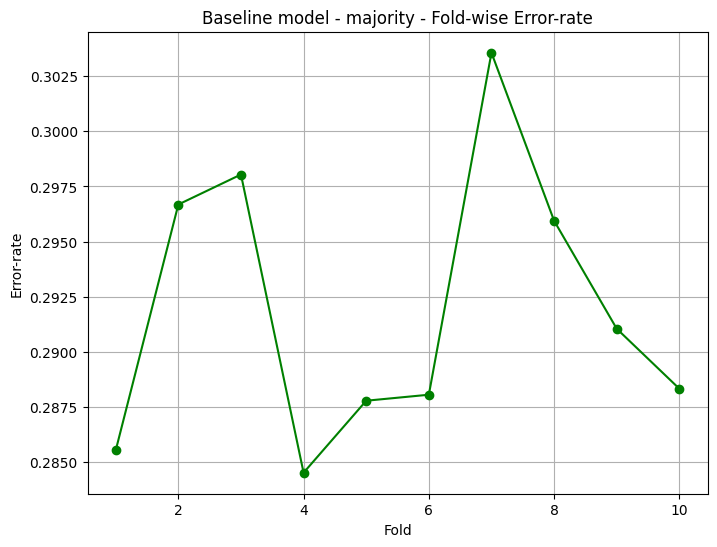

Majority Classifier Average Error-rate: 0.29194445304870786


In [24]:
# Baseline fold plot

import matplotlib.pyplot as plt
# Plot from the regression part
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(majority_errorfinal) + 1), majority_errorfinal, marker='o', linestyle='-', color='g')
plt.xlabel('Fold')
plt.ylabel('Error-rate')
plt.title('Baseline model - majority - Fold-wise Error-rate')
plt.grid(True)
plt.show()

# Model average
print("Majority Classifier Average Error-rate:", np.mean(majority_errorfinal))

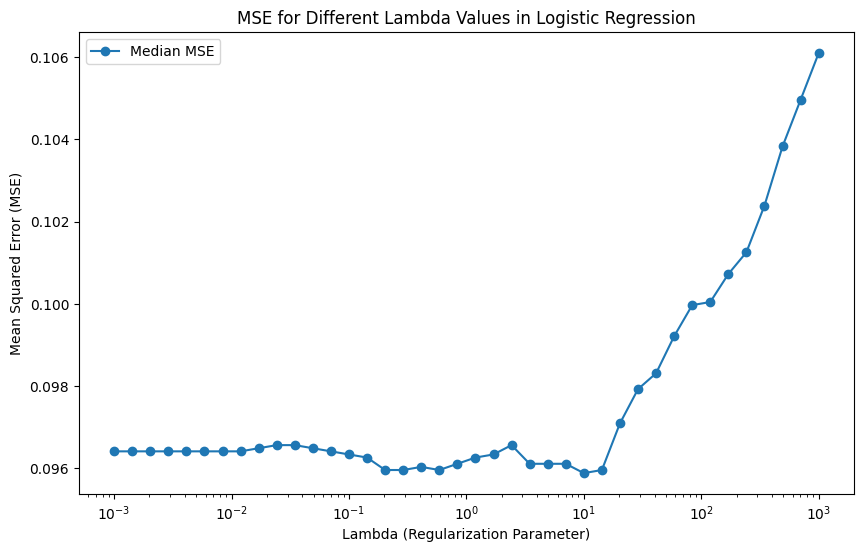

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import pandas as pd  # For easier moving average calculation

# Generate 100 logarithmically spaced lambda values from 0.01 to 100
lambdas = np.logspace(-3, 3, 40)  # Logarithmic scale lambda values

# Dictionary to hold median errors for each lambda across all folds
lambda_errors = {lambda_val: [] for lambda_val in lambdas}

# Outer loop for each outer fold
for fold_info in outer_fold_splits:
    train_outer_idx = fold_info["train_outer_idx"]
    test_outer_idx = fold_info["test_outer_idx"]
    
    X_train_outer, X_test_outer = X_scaled[train_outer_idx], X_scaled[test_outer_idx]
    y_train_outer, y_test_outer = y[train_outer_idx], y[test_outer_idx]
    
    for lambda_val in lambdas:
        inner_errors = []
        
        # Inner loop to evaluate each lambda using inner splits
        for inner_train_idx, inner_test_idx in fold_info["inner_splits"]:
            X_inner_train, X_inner_test = X_train_outer[inner_train_idx], X_train_outer[inner_test_idx]
            y_inner_train, y_inner_test = y_train_outer[inner_train_idx], y_train_outer[inner_test_idx]
            
            # Train Logistic Regression with L2 regularization
            model = LogisticRegression(C=1/lambda_val, penalty='l2', solver='lbfgs', max_iter=1000)
            model.fit(X_inner_train, y_inner_train)
            
            # Calculate MSE on inner test fold
            y_pred_inner = model.predict(X_inner_test)
            inner_mse = mean_squared_error(y_inner_test, y_pred_inner)
            inner_errors.append(inner_mse)
        
        # Store the median MSE for this lambda value
        median_inner_mse = np.median(inner_errors)
        lambda_errors[lambda_val].append(median_inner_mse)

# Calculate the median MSE across folds for each lambda value
median_lambda_mse = {lambda_val: np.median(errors) for lambda_val, errors in lambda_errors.items()}
lambda_mse_df = pd.DataFrame(list(median_lambda_mse.items()), columns=['Lambda', 'MSE'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(lambda_mse_df['Lambda'], lambda_mse_df['MSE'], marker='o', linestyle='-', label='Median MSE')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Lambda Values in Logistic Regression')
plt.xscale('log')  # Logarithmic scale for lambda
plt.legend()
plt.show()


In [47]:
# Find the lambda corresponding to the minimal MSE
best_lambda = min(median_lambda_mse, key=median_lambda_mse.get)

# Get the minimal MSE value
best_mse = median_lambda_mse[best_lambda]

# Print the results
print(f"The lambda value with the minimal MSE is: {best_lambda}")
print(f"The minimal MSE is: {best_mse:.4f}")

The lambda value with the minimal MSE is: 10.0
The minimal MSE is: 0.0959


# Logistic regression

In [13]:
# Lists to store error rates and selected parameters for each model
logistic_params = []
i = 0 
logistic_errors = []

# Outer loop for each outer fold
for fold_info in outer_fold_splits:
    train_outer_idx = fold_info["train_outer_idx"]
    test_outer_idx = fold_info["test_outer_idx"]
    
    X_train_outer, X_test_outer = X_scaled[train_outer_idx], X_scaled[test_outer_idx]
    y_train_outer, y_test_outer = y[train_outer_idx], y[test_outer_idx]
    
    # Logistic Regression Inner Loop (for hyperparameter tuning)
    best_logistic_lambda = None
    best_logistic_error = float('inf')
    
    for lambda_val in lambdas:
        inner_errors = []
        
        # Inner loop to evaluate each lambda using inner splits
        for inner_train_idx, inner_test_idx in fold_info["inner_splits"]:
            X_inner_train, X_inner_test = X_train_outer[inner_train_idx], X_train_outer[inner_test_idx]
            y_inner_train, y_inner_test = y_train_outer[inner_train_idx], y_train_outer[inner_test_idx]
            
            # Train Logistic Regression with L2 regularization
            model = LogisticRegression(C=1/lambda_val, penalty='l2', solver='lbfgs', max_iter=1000)
            model.fit(X_inner_train, y_inner_train)
            
            # Calculate error rate on inner test fold
            y_pred_inner = model.predict(X_inner_test)
            inner_error = 1 - accuracy_score(y_inner_test, y_pred_inner)
            inner_errors.append(inner_error)
        
        # Calculate mean error rate for this lambda
        mean_inner_error = np.mean(inner_errors)
        
        # Update best lambda if this one has a lower mean error rate
        if mean_inner_error < best_logistic_error:
            best_logistic_error = mean_inner_error
            best_logistic_lambda = lambda_val

    # Save the best parameter for this outer fold
    logistic_params.append(best_logistic_lambda)

    # Train logistic regression with the best lambda on the outer training set
    final_logistic_model = LogisticRegression(C=1/best_logistic_lambda, penalty='l2', solver='lbfgs', max_iter=1000)
    final_logistic_model.fit(X_train_outer, y_train_outer)
    
    # Calculate error rate on the outer test set
    y_pred_outer_logistic = final_logistic_model.predict(X_test_outer)
    logistic_error = 1 - accuracy_score(y_test_outer, y_pred_outer_logistic)
    logistic_errors.append(logistic_error)
    i = i+1
    print('Best lambda fold = ',best_logistic_lambda,'Error rate =',logistic_error)
    print(len(logistic_errors),i,logistic_errors)

print('Best lambda',best_logistic_lambda)
print(f'Average outer error rate for Logistic Regression: {np.mean(logistic_errors):.4f} ± {np.std(logistic_errors,ddof=1):.4f}')

Best lambda fold =  10 Error rate = 0.09553620032661947
1 1 [0.09553620032661947]
Best lambda fold =  0.01 Error rate = 0.10560696788241697
2 2 [0.09553620032661947, 0.10560696788241697]
Best lambda fold =  1.01 Error rate = 0.0963527490473598
3 3 [0.09553620032661947, 0.10560696788241697, 0.0963527490473598]
Best lambda fold =  0.1 Error rate = 0.0971957527906343
4 4 [0.09553620032661947, 0.10560696788241697, 0.0963527490473598, 0.0971957527906343]
Best lambda fold =  10 Error rate = 0.08848352845085761
5 5 [0.09553620032661947, 0.10560696788241697, 0.0963527490473598, 0.0971957527906343, 0.08848352845085761]
Best lambda fold =  0.01 Error rate = 0.09774026681187042
6 6 [0.09553620032661947, 0.10560696788241697, 0.0963527490473598, 0.0971957527906343, 0.08848352845085761, 0.09774026681187042]
Best lambda fold =  0.01 Error rate = 0.09583446773754423
7 7 [0.09553620032661947, 0.10560696788241697, 0.0963527490473598, 0.0971957527906343, 0.08848352845085761, 0.09774026681187042, 0.095834

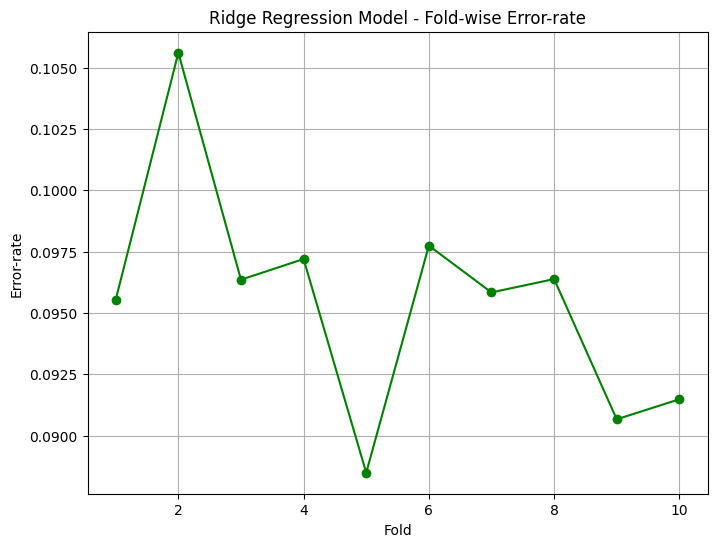

Ridge Regression Model Average Error-rate: 0.09552688549095406


In [ ]:
# Logistic regression plot

import matplotlib.pyplot as plt
# Plot from the regression part
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ridge_errors) + 1), ridge_errors, marker='o', linestyle='-', color='g')
plt.xlabel('Fold')
plt.ylabel('Error-rate')
plt.title('Logistic Regression Model - Fold-wise Error-rate')
plt.grid(True)
plt.show()

# Model average
print("Logistic Regression Model Average Error-rate:", np.mean(ridge_errors))

# KNN part
Takes approx 15 minutes to run

In [53]:
# Lists to store error rates and selected parameters for KNN model
knn_params = []
i = 0  # Counter for tracking folds
knn_errors = []

# Outer loop for each outer fold
for fold_info in outer_fold_splits:
    train_outer_idx = fold_info["train_outer_idx"]
    test_outer_idx = fold_info["test_outer_idx"]
    
    X_train_outer, X_test_outer = X_scaled[train_outer_idx], X_scaled[test_outer_idx]
    y_train_outer, y_test_outer = y[train_outer_idx], y[test_outer_idx]
    
    # KNN Hyperparameter Tuning: Try different values of K
    best_k = None
    best_knn_error = float('inf')

    # Example range for K values
    k_values = range(1, 21)  

    for k in k_values:
        inner_errors = []
        
        # Inner loop to evaluate each K using inner splits
        for inner_train_idx, inner_val_idx in fold_info["inner_splits"]:
            X_inner_train, X_inner_val = X_train_outer[inner_train_idx], X_train_outer[inner_val_idx]
            y_inner_train, y_inner_val = y_train_outer[inner_train_idx], y_train_outer[inner_val_idx]
            
            # Train KNN
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_inner_train, y_inner_train)
            
            # Calculate error rate on inner validation fold
            y_pred_inner = model.predict(X_inner_val)
            inner_error = 1 - accuracy_score(y_inner_val, y_pred_inner)  # Misclassification rate
            inner_errors.append(inner_error)

        # Calculate mean error rate for this K
        mean_inner_error = np.mean(inner_errors)
        
        # Update best K if this one has a lower mean error rate
        if mean_inner_error < best_knn_error:
            best_knn_error = mean_inner_error
            best_k = k

    # Save the best K for this outer fold
    knn_params.append(best_k)

    # Train KNN with the best K on the outer training set
    final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
    final_knn_model.fit(X_train_outer, y_train_outer)
    
    # Calculate error rate on the outer test set
    y_pred_outer_knn = final_knn_model.predict(X_test_outer)
    knn_error = 1 - accuracy_score(y_test_outer, y_pred_outer_knn)  # Misclassification rate
    knn_errors.append(knn_error)
    
    i += 1  # Increment fold counter
    print(f'Best K for fold {i} = {best_k}, Error rate = {knn_error:.4f}')
    print(len(knn_errors), i, knn_errors)

# Calculate average performance of the KNN model
mean_knn_error = np.mean(knn_errors)
std_knn_error = np.std(knn_errors)

print(f'Average outer error rate for KNN: {mean_knn_error:.4f} ± {std_knn_error:.4f}')


# TODO Take best K and lambda values (Check with TA) 
# TODO finish 4, be sure that what we did is correct (0 p-values??)
# TODO Create table in Latex with the results - DONE

Best K for fold 1 = 9, Error rate = 0.0645
1 1 [0.06450734893848664]
Best K for fold 2 = 9, Error rate = 0.0738
2 2 [0.06450734893848664, 0.07376156777354381]
Best K for fold 3 = 3, Error rate = 0.0634
3 3 [0.06450734893848664, 0.07376156777354381, 0.06341861731083287]
Best K for fold 4 = 3, Error rate = 0.0648
4 4 [0.06450734893848664, 0.07376156777354381, 0.06341861731083287, 0.06479716852708961]
Best K for fold 5 = 5, Error rate = 0.0653
5 5 [0.06450734893848664, 0.07376156777354381, 0.06341861731083287, 0.06479716852708961, 0.06534168254832562]
Best K for fold 6 = 3, Error rate = 0.0681
6 6 [0.06450734893848664, 0.07376156777354381, 0.06341861731083287, 0.06479716852708961, 0.06534168254832562, 0.06806425265450589]
Best K for fold 7 = 5, Error rate = 0.0686
7 7 [0.06450734893848664, 0.07376156777354381, 0.06341861731083287, 0.06479716852708961, 0.06534168254832562, 0.06806425265450589, 0.0686087666757419]
Best K for fold 8 = 3, Error rate = 0.0678
8 8 [0.06450734893848664, 0.073761

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

# Stores predictions and errors for each model in each outer fold
baseline_errors, knn_errors, logistic_errors = [], [], []
baseline_preds, knn_preds, logistic_preds = [], [], []

# Outer loop for each outer fold to collect predictions for McNemar's test
for fold_info in outer_fold_splits:
    train_outer_idx = fold_info["train_outer_idx"]
    test_outer_idx = fold_info["test_outer_idx"]

    X_train_outer, X_test_outer = X_scaled[train_outer_idx], X_scaled[test_outer_idx]
    y_train_outer, y_test_outer = y[train_outer_idx], y[test_outer_idx]

    ### Baseline (Dummy Classifier)
    majority_class_outer = np.round(np.mean(y_train_outer))
    baseline_pred = majority_class_outer * np.ones_like(y_test_outer)
    baseline_preds.append(baseline_pred)
    baseline_errors.append(1 - accuracy_score(y_test_outer, baseline_pred))

    ### Logistic Regression
    # Best lambda selection 
    best_lambda = logistic_params[len(baseline_errors)-1]
    final_logistic_model = LogisticRegression(C=1/best_lambda, penalty='l2', solver='lbfgs', max_iter=1000)
    final_logistic_model.fit(X_train_outer, y_train_outer)
    logistic_pred = final_logistic_model.predict(X_test_outer)
    logistic_preds.append(logistic_pred)
    logistic_errors.append(1 - accuracy_score(y_test_outer, logistic_pred))

    ### KNN
    # Best k selection 
    best_k = knn_params[len(baseline_errors)-1]
    final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
    final_knn_model.fit(X_train_outer, y_train_outer)
    knn_pred = final_knn_model.predict(X_test_outer)
    knn_preds.append(knn_pred)
    knn_errors.append(1 - accuracy_score(y_test_outer, knn_pred))

# Flatten predictions arrays for comparison across all outer folds
baseline_preds = np.concatenate(baseline_preds)
logistic_preds = np.concatenate(logistic_preds)
knn_preds = np.concatenate(knn_preds)
y_test_all = np.concatenate([y[fold_info["test_outer_idx"]] for fold_info in outer_fold_splits])

# McNemar contingency table
def get_mcnemar_contingency(y_true, y_pred_1, y_pred_2):
    correct_1 = y_pred_1 == y_true
    correct_2 = y_pred_2 == y_true
    only_model_1_correct = np.sum(correct_1 & ~correct_2)
    only_model_2_correct = np.sum(correct_2 & ~correct_1)
    both_correct = np.sum(correct_1 & correct_2)
    both_incorrect = np.sum(~correct_1 & ~correct_2)
    return np.array([[both_correct, only_model_2_correct], [only_model_1_correct, both_incorrect]])

# McNemar tests for each pair
for (pred_1, pred_2, name_1, name_2) in [
    (baseline_preds, knn_preds, "Baseline", "KNN"),
    (baseline_preds, logistic_preds, "Baseline", "Logistic Regression"),
    (knn_preds, logistic_preds, "KNN", "Logistic Regression")
]:
    contingency_table = get_mcnemar_contingency(y_test_all, pred_1, pred_2)
    result = mcnemar(contingency_table, exact=False)
    print(f"\nMcNemar Test between {name_1} and {name_2}")
    print(f"Contingency Table:\n{contingency_table}")
    print(f"McNemar’s test statistic: {result.statistic}, p-value: {result.pvalue}")

print("Majority Classifier Average Error-rate:", np.mean(majority_errorfinal))
print(f'Average outer error rate for Logistic Regression: {np.mean(ridge_errors):.4f} ± {np.std(ridge_errors,ddof=1):.4f}')
print(f'Average outer error rate for KNN: {mean_knn_error:.4f} ± {std_knn_error:.4f}')


McNemar Test between Baseline and KNN
Contingency Table:
[[25095  9204]
 [  914  1520]]
McNemar’s test statistic: 6790.622751531923, p-value: 0.0

McNemar Test between Baseline and Logistic Regression
Contingency Table:
[[24833  8391]
 [ 1176  2333]]
McNemar’s test statistic: 5439.719452283893, p-value: 0.0

McNemar Test between KNN and Logistic Regression
Contingency Table:
[[32392   832]
 [ 1907  1602]]
McNemar’s test statistic: 421.1303395399781, p-value: 1.384889990978853e-93
Majority Classifier Average Error-rate: 0.29194445304870786
Average outer error rate for Logistic Regression: nan ± nan
Average outer error rate for KNN: 0.0663 ± 0.0032


c:\Users\Mille\anaconda3\envs\mlenv\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning:

Mean of empty slice.

c:\Users\Mille\anaconda3\envs\mlenv\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning:

invalid value encountered in scalar divide

c:\Users\Mille\anaconda3\envs\mlenv\Lib\site-packages\numpy\_core\_methods.py:227: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\Users\Mille\anaconda3\envs\mlenv\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning:

invalid value encountered in divide

c:\Users\Mille\anaconda3\envs\mlenv\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning:

invalid value encountered in scalar divide



In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np
from scipy.stats import norm

# Stores predictions and errors for each model in each outer fold
baseline_errors, knn_errors, logistic_errors = [], [], []
baseline_preds, knn_preds, logistic_preds = [], [], []

# Outer loop for each outer fold to collect predictions for McNemar's test
for fold_info in outer_fold_splits:
    train_outer_idx = fold_info["train_outer_idx"]
    test_outer_idx = fold_info["test_outer_idx"]

    X_train_outer, X_test_outer = X_scaled[train_outer_idx], X_scaled[test_outer_idx]
    y_train_outer, y_test_outer = y[train_outer_idx], y[test_outer_idx]

    ### Baseline (Dummy Classifier)
    majority_class_outer = np.round(np.mean(y_train_outer))
    baseline_pred = majority_class_outer * np.ones_like(y_test_outer)
    baseline_preds.append(baseline_pred)
    baseline_errors.append(1 - accuracy_score(y_test_outer, baseline_pred))

    ### Logistic Regression
    # Best lambda selection 
    best_lambda = logistic_params[len(baseline_errors)-1]
    final_logistic_model = LogisticRegression(C=1/best_lambda, penalty='l2', solver='lbfgs', max_iter=1000)
    final_logistic_model.fit(X_train_outer, y_train_outer)
    logistic_pred = final_logistic_model.predict(X_test_outer)
    logistic_preds.append(logistic_pred)
    logistic_errors.append(1 - accuracy_score(y_test_outer, logistic_pred))

    ### KNN
    # Best k selection 
    best_k = knn_params[len(baseline_errors)-1]
    final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
    final_knn_model.fit(X_train_outer, y_train_outer)
    knn_pred = final_knn_model.predict(X_test_outer)
    knn_preds.append(knn_pred)
    knn_errors.append(1 - accuracy_score(y_test_outer, knn_pred))

# Flatten predictions arrays for comparison across all outer folds
baseline_preds = np.concatenate(baseline_preds)
logistic_preds = np.concatenate(logistic_preds)
knn_preds = np.concatenate(knn_preds)
y_test_all = np.concatenate([y[fold_info["test_outer_idx"]] for fold_info in outer_fold_splits])

# McNemar contingency table
def get_mcnemar_contingency(y_true, y_pred_1, y_pred_2):
    correct_1 = y_pred_1 == y_true
    correct_2 = y_pred_2 == y_true
    only_model_1_correct = np.sum(correct_1 & ~correct_2)
    only_model_2_correct = np.sum(correct_2 & ~correct_1)
    both_correct = np.sum(correct_1 & correct_2)
    both_incorrect = np.sum(~correct_1 & ~correct_2)
    return np.array([[both_correct, only_model_2_correct], [only_model_1_correct, both_incorrect]])

# McNemar tests for each pair
for (pred_1, pred_2, name_1, name_2) in [
    (baseline_preds, knn_preds, "Baseline", "KNN"),
    (baseline_preds, logistic_preds, "Baseline", "Logistic Regression"),
    (knn_preds, logistic_preds, "KNN", "Logistic Regression")
]:
    contingency_table = get_mcnemar_contingency(y_test_all, pred_1, pred_2)
    result = mcnemar(contingency_table, exact=False)
    
    # Calculate θ (performance difference)
    n12 = contingency_table[0, 1]  # number of times model 1 was correct and model 2 was wrong
    n21 = contingency_table[1, 0]  # number of times model 2 was correct and model 1 was wrong
    n = n12 + n21  # Total number of disagreements
    theta = (n12 - n21) / n  # Estimated performance difference
    
    # Asymptotic confidence interval for θ using the normal approximation
    standard_error = np.sqrt(n / (n12 * n21))  # Standard error of the performance difference
    z_score = norm.ppf(0.975)  # 95% confidence level
    lower_bound = theta - z_score * standard_error
    upper_bound = theta + z_score * standard_error
    
    # Print McNemar test results and θ estimate with confidence interval
    print(f"\nMcNemar Test between {name_1} and {name_2}")
    print(f"Contingency Table:\n{contingency_table}")
    print(f"McNemar’s test statistic: {result.statistic}, p-value: {result.pvalue}")
    print(f"Estimated performance difference (θ): {theta:.4f}")
    print(f"Confidence Interval for θ: [{lower_bound:.4f}, {upper_bound:.4f}]")

# Reporting final error rates
print("Majority Classifier Average Error-rate:", np.mean(baseline_errors))
print(f'Average outer error rate for Logistic Regression: {np.mean(logistic_errors):.4f} ± {np.std(logistic_errors, ddof=1):.4f}')
print(f'Average outer error rate for KNN: {np.mean(knn_errors):.4f} ± {np.std(knn_errors, ddof=1):.4f}')



McNemar Test between Baseline and KNN
Contingency Table:
[[25095  9204]
 [  914  1520]]
McNemar’s test statistic: 6790.622751531923, p-value: 0.0
Estimated performance difference (θ): 0.8193
Confidence Interval for θ: [0.7514, 0.8873]

McNemar Test between Baseline and Logistic Regression
Contingency Table:
[[24833  8391]
 [ 1176  2333]]
McNemar’s test statistic: 5439.719452283893, p-value: 0.0
Estimated performance difference (θ): 0.7542
Confidence Interval for θ: [0.6931, 0.8152]

McNemar Test between KNN and Logistic Regression
Contingency Table:
[[32392   832]
 [ 1907  1602]]
McNemar’s test statistic: 421.1303395399781, p-value: 1.384889990978853e-93
Estimated performance difference (θ): -0.3925
Confidence Interval for θ: [-0.4739, -0.3110]
Majority Classifier Average Error-rate: 0.29194445304870786
Average outer error rate for Logistic Regression: 0.0955 ± 0.0047
Average outer error rate for KNN: 0.0663 ± 0.0034


# Parameter stuff (5)

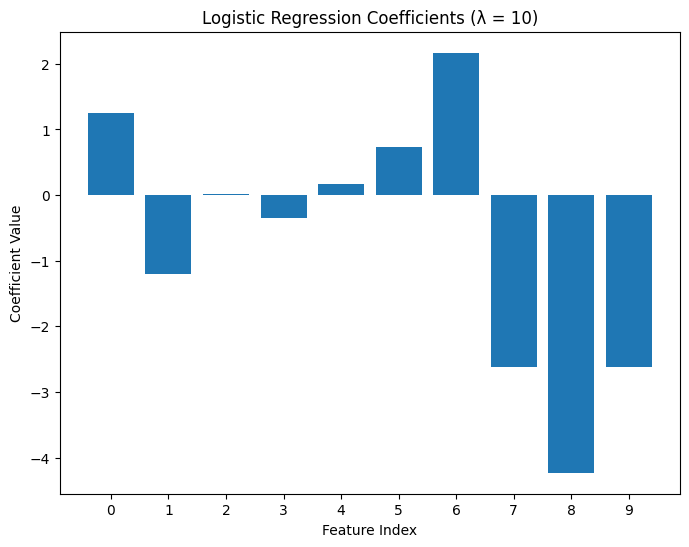

In [21]:
X_scaled = df_standardized.values 

lambda_value = 10
C_value = 1 / lambda_value  # Inverse of lambda

# Training of the logistic regression model with C = 1/10
final_logistic_model = LogisticRegression(C=C_value, penalty='l2', solver='lbfgs', max_iter=1000)
final_logistic_model.fit(X_scaled, y)  # Assuming X_scaled and y are already defined

# Extract the weight coefficients from the model
coefficients = final_logistic_model.coef_.flatten()  # Flatten if it's a 2D array (for binary classification)

# Create a plot of the coefficients / parameters
plt.figure(figsize=(8, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title(f'Logistic Regression Coefficients (λ = {lambda_value})')
plt.xticks(range(len(coefficients)))  # Adjust x-axis to show feature indices
plt.show()

In [23]:
# Latex table of feature weights
# Assuming feature names are stored in a list called feature_names
feature_names = ['Ambient temperature', 'Ambient pressure', 'Ambient humidity', 
                 'Air filter difference pressure', 'Gas turbine exhaust pressure', 
                 'Turbine inlet temperature', 'Turbine after temperature', 
                 'Turbine energy yield', 'Compressor discharge pressure']

# Create the LaTeX table
print("\\begin{table}[h]")
print("\\centering")
print("\\caption{Coefficients for Each Feature}")
print("\\label{tab:coefficients}")
print("\\begin{tabular}{|l|r|}")
print("\\hline")
print("\\textbf{Feature} & \\textbf{Coefficient} \\\\")
print("\\hline")

# Loop over the features and coefficients to populate the table
for feature, coeff in zip(feature_names, coefficients):
    print(f"{feature} & {coeff:.2f} \\\\")

# Close the LaTeX table
print("\\hline")
print("\\end{tabular}")
print("\\end{table}")

\begin{table}[h]
\centering
\caption{Coefficients for Each Feature}
\label{tab:coefficients}
\begin{tabular}{|l|r|}
\hline
\textbf{Feature} & \textbf{Coefficient} \\
\hline
Ambient temperature & 1.25 \\
Ambient pressure & -1.21 \\
Ambient humidity & 0.02 \\
Air filter difference pressure & -0.35 \\
Gas turbine exhaust pressure & 0.17 \\
Turbine inlet temperature & 0.73 \\
Turbine after temperature & 2.17 \\
Turbine energy yield & -2.63 \\
Compressor discharge pressure & -4.23 \\
\hline
\end{tabular}
\end{table}


# no longer me

In [ ]:
# Lists to store error rates and selected parameters for KNN model
knn_params = []
i = 0  # Counter for tracking folds
knn_errors = []

# Outer loop for each outer fold
for fold_info in outer_fold_splits:
    train_outer_idx = fold_info["train_outer_idx"]
    test_outer_idx = fold_info["test_outer_idx"]
    
    X_train_outer, X_test_outer = X_scaled[train_outer_idx], X_scaled[test_outer_idx]
    y_train_outer, y_test_outer = y[train_outer_idx], y[test_outer_idx]
    
    # KNN Hyperparameter Tuning: Try different values of K
    best_k = None
    best_knn_error = float('inf')

    # Example range for K values
    k_values = range(1, 21)  # You can adjust this range as needed

    for k in k_values:
        inner_errors = []
        
        # Inner loop to evaluate each K using inner splits
        for inner_train_idx, inner_val_idx in fold_info["inner_splits"]:
            X_inner_train, X_inner_val = X_train_outer[inner_train_idx], X_train_outer[inner_val_idx]
            y_inner_train, y_inner_val = y_train_outer[inner_train_idx], y_train_outer[inner_val_idx]
            
            # Train KNN
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_inner_train, y_inner_train)
            
            # Calculate error rate on inner validation fold
            y_pred_inner = model.predict(X_inner_val)
            inner_error = 1 - accuracy_score(y_inner_val, y_pred_inner)  # Misclassification rate
            inner_errors.append(inner_error)

        # Calculate mean error rate for this K
        mean_inner_error = np.mean(inner_errors)
        
        # Update best K if this one has a lower mean error rate
        if mean_inner_error < best_knn_error:
            best_knn_error = mean_inner_error
            best_k = k

    # Save the best K for this outer fold
    knn_params.append(best_k)

    # Train KNN with the best K on the outer training set
    final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
    final_knn_model.fit(X_train_outer, y_train_outer)
    
    # Calculate error rate on the outer test set
    y_pred_outer_knn = final_knn_model.predict(X_test_outer)
    knn_error = 1 - accuracy_score(y_test_outer, y_pred_outer_knn)  # Misclassification rate
    knn_errors.append(knn_error)
    
    i += 1  # Increment fold counter
    print(f'Best K for fold {i} = {best_k}, Error rate = {knn_error:.4f}')
    print(len(knn_errors), i, knn_errors)

# Calculate average performance of the KNN model
mean_knn_error = np.mean(knn_errors)
std_knn_error = np.std(knn_errors)

print(f'Average outer error rate for KNN: {mean_knn_error:.4f} ± {std_knn_error:.4f}')


ValueError: '=' alignment not allowed in string format specifier

In [ ]:
# K1 = K2 = 10 fold cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Initialize the KFold object

kf = KFold(n_splits=10)

# Initilze the Lists

scores_knn = []
std_knn = []

scores_reg = []
std_reg = []

scores_mcc = []
std_mcc = []

for model_ in models:
    # Perform 10-fold cross-validation

    if model_ == model_knn:
        for neighbor_ in neighbors:
            model_ = KNeighborsClassifier(n_neighbors=neighbor_)
            scores = cross_val_score(model_, df_standardized, CO_binarized, cv=kf)

            # Calculate the mean and standard deviation of the scores
            mean_score = scores.mean()
            std_score = scores.std()

            scores_knn.append(mean_score)
            std_knn.append(std_score)

            print(f"Model: {model_}")
            print(f"Mean Score: {mean_score}")
            print(f"Standard Deviation of Scores: {std_score}")
            print("\n\n")
    elif model_ == model_reg:
        for lambda_ in lambdas:
            model_ = LogisticRegression(penalty='l2', C=1/lambda_, max_iter=1000)
            scores = cross_val_score(model_, df_standardized, CO_binarized, cv=kf)

            # Calculate the mean and standard deviation of the scores
            mean_score = scores.mean()
            std_score = scores.std()

            scores_reg.append(mean_score)
            std_reg.append(std_score)

            print(f"Model: {model_}")
            print(f"Mean Score: {mean_score}")
            print(f"Standard Deviation of Scores: {std_score}")
            print("\n\n")
    elif model_ == model_mcc:
        model_ = DummyClassifier(strategy='most_frequent')
        scores = cross_val_score(model_, df_standardized, CO_binarized, cv=kf)

        # Calculate the mean and standard deviation of the scores
        mean_score = scores.mean()
        std_score = scores.std()

        scores_mcc.append(mean_score)
        std_mcc.append(std_score)

        print(f"Model: {model_}")
        print(f"Mean Score: {mean_score}")
        print(f"Standard Deviation of Scores: {std_score}")
        print("\n\n")


# Create a bar plot to compare the models
fig_comparison = go.Figure()

# Add bars for accuracy for Logistic Regression
fig_comparison.add_trace(go.Bar(
    x=[str(lambda_) for lambda_ in lambdas],
    y=scores_reg,
    error_y=dict(type='data', array=std_reg, visible=True),
    name='Logistic Regression Accuracy'
))


# Add bars for accuracy for K-Nearest Neighbors
fig_comparison.add_trace(go.Bar(
    x=[str(neighbor_) for neighbor_ in neighbors],
    y=scores_knn,
    error_y=dict(type='data', array=std_knn, visible=True),
    name='K-Nearest Neighbors Accuracy'
))

# Add bars for accuracy for Majority Classifier
fig_comparison.add_trace(go.Bar(
    x=['Majority Classifier'],
    y=scores_mcc,
    error_y=dict(type='data', array=std_mcc, visible=True),
    name='Majority Classifier Accuracy'
))


# Add a horizontal line for the baseline model's MSE
fig_comparison.add_shape(
    type="line",
    x0=-0.5,  # Start of the line on the x-axis
    y0=mse_baseline,  # Baseline MSE value
    x1=10,  # End of the line on the x-axis
    y1=mse_baseline,  # Baseline MSE value
    line=dict(
        color="black",
        width=2,
        dash="dashdot",
    )
)

# Add a dummy trace to include the baseline MSE in the legend

fig_comparison.add_trace(go.Scatter
(
    x=[None], y=[None],
    mode='lines',
    line=dict(color='black', width=2, dash='dashdot'),
    showlegend=True,
    name=f'Baseline MSE {mse_baseline:.2f}'
))


# Update layout
fig_comparison.update_layout(
    title='Model Comparison',
    xaxis_title='Model Parameter',
    yaxis_title='Metric Value',
    barmode='group'
)

fig_comparison.show()




Model: LogisticRegression(C=100.0, max_iter=1000)
Mean Score: 0.8831249265447028
Standard Deviation of Scores: 0.08076528575094451



Model: LogisticRegression(C=10.0, max_iter=1000)
Mean Score: 0.8829615871590729
Standard Deviation of Scores: 0.08112383610532703



Model: LogisticRegression(C=0.9900990099009901, max_iter=1000)
Mean Score: 0.8827166892361848
Standard Deviation of Scores: 0.08067375556018548



Model: LogisticRegression(C=0.1, max_iter=1000)
Mean Score: 0.8833705210424139
Standard Deviation of Scores: 0.07822683508927099



Model: LogisticRegression(C=0.01, max_iter=1000)
Mean Score: 0.8765925960617438
Standard Deviation of Scores: 0.07336947901329113



Model: KNeighborsClassifier(n_neighbors=1)
Mean Score: 0.8516003213729461
Standard Deviation of Scores: 0.05147098028759736



Model: KNeighborsClassifier(n_neighbors=3)
Mean Score: 0.8676350143561107
Standard Deviation of Scores: 0.05189191314735006



Model: KNeighborsClassifier()
Mean Score: 0.8759657009521288
Standa

2. **Statistical Evaluation**  
   We will statistically evaluate the performance of the three models using McNemar’s test, as outlined in section 11.3 of the lecture notes. Pairwise comparisons between logistic regression, method 2, and the baseline will be performed to test for significant differences. P-values and confidence intervals will be reported for each comparison.

3. **Logistic Regression Interpretation**  
   Using the optimal value of λ, we will train a logistic regression model. The prediction of the logistic regression model is computed as the probability of an observation belonging to a particular class based on the weighted combination of attributes. The relevance of the features in this classification task will be discussed in the context of the problem domain.


## Conclusion  
   The results of the classification analysis, including the comparison between logistic regression, method 2, and the baseline, will inform our understanding of which model is best suited for this task. Additionally, the importance of specific attributes in predicting class labels will be assessed, with a discussion on how the results relate to the original classification problem.